In [183]:
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import itertools
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lukpy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukpy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lukpy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lukpy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [184]:
spam_dataset = pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0, 1], names=['Spam', 'Text'],
                           skiprows=1)
spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [185]:
print(spam_dataset['Spam'].value_counts(normalize=True))

0    0.865937
1    0.134063
Name: Spam, dtype: float64


In [186]:
def remove_puncation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned
spam_dataset['Cleaned_Text'] = spam_dataset['Text'].apply(lambda x: remove_puncation(x))
spam_dataset

,Spam,Text,Cleaned_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


In [187]:
def tokenize(text):

    # Usunięcie wielkich liter
    clean_text = text.lower()

    # Tokenizacja
    tokenized_text = nltk.word_tokenize(clean_text)
    return tokenized_text

spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_Text'].apply(lambda x: tokenize(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,..."
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


In [188]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [189]:
def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords
spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."


In [190]:
stemmer = nltk.PorterStemmer()
def stemming(text):
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words
spam_dataset['Stemmed_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: stemming(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Stemmed_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som..."


In [191]:
lemmater = nltk.WordNetLemmatizer()
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word) for word in text]
    return lemmatized_words
spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: lemmatizing(x))
spam_dataset

,Spam,Text,Cleaned_Text,Tokenized_Text,WithoutStop_Text,Stemmed_Text,Lemmatized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tri, 2, contact, u, u, å£750, poun...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanad, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interest, buy, som...","[guy, bitching, acted, like, id, interested, b..."


In [192]:
words_spam = list(spam_dataset.loc[spam_dataset['Spam']==1, 'Lemmatized_Text'].values)
words_spam = list(itertools.chain.from_iterable(words_spam))
words_spam = ' '.join(words_spam)
words_notspam = list(spam_dataset.loc[spam_dataset['Spam']==0, 'Lemmatized_Text'].values)
words_notspam = list(itertools.chain.from_iterable(words_notspam))
words_notspam = ' '.join(words_notspam)

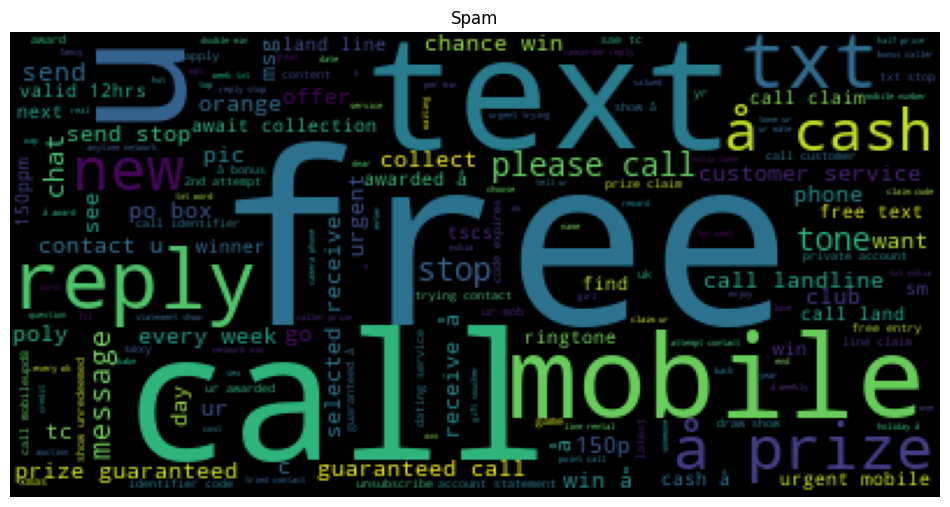

In [193]:
wordcloud = WordCloud().generate(words_spam)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Spam')
plt.show()

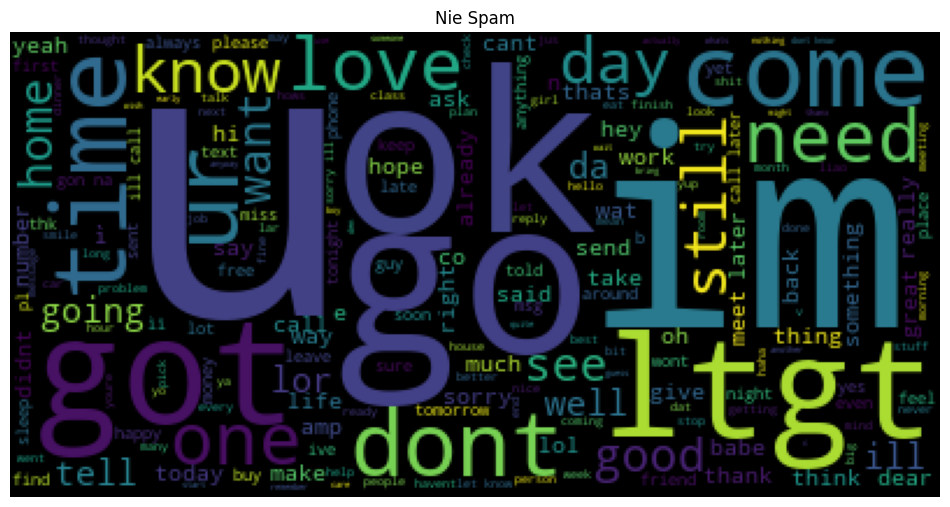

In [194]:
wordcloud = WordCloud().generate(words_notspam)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Nie Spam')
plt.show()

In [195]:
X =spam_dataset['Lemmatized_Text'].apply(lambda x: ' '.join(x))
y=spam_dataset['Spam']

# Szacowanie bazowego modelu RF, bazującego na pełnej macierzy X

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [197]:
from sklearn.pipeline import Pipeline

wektoryzacja = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, min_df=0.01, use_idf=True))
    ])

In [198]:
from sklearn.ensemble import RandomForestClassifier

model_pipeline1 = Pipeline(steps=[('wektoryzacja', wektoryzacja),
                                    ('model', RandomForestClassifier(n_estimators=1000, max_depth=20, min_samples_leaf=2))])

In [199]:
model_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('wektoryzacja',
                 Pipeline(steps=[('tfidf',
                                  TfidfVectorizer(max_df=0.5, min_df=0.01,
                                                  ngram_range=(1, 2)))])),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        n_estimators=1000))])

In [200]:
list(model_pipeline1.get_params().keys())

['memory',
 'steps',
 'verbose',
 'wektoryzacja',
 'model',
 'wektoryzacja__memory',
 'wektoryzacja__steps',
 'wektoryzacja__verbose',
 'wektoryzacja__tfidf',
 'wektoryzacja__tfidf__analyzer',
 'wektoryzacja__tfidf__binary',
 'wektoryzacja__tfidf__decode_error',
 'wektoryzacja__tfidf__dtype',
 'wektoryzacja__tfidf__encoding',
 'wektoryzacja__tfidf__input',
 'wektoryzacja__tfidf__lowercase',
 'wektoryzacja__tfidf__max_df',
 'wektoryzacja__tfidf__max_features',
 'wektoryzacja__tfidf__min_df',
 'wektoryzacja__tfidf__ngram_range',
 'wektoryzacja__tfidf__norm',
 'wektoryzacja__tfidf__preprocessor',
 'wektoryzacja__tfidf__smooth_idf',
 'wektoryzacja__tfidf__stop_words',
 'wektoryzacja__tfidf__strip_accents',
 'wektoryzacja__tfidf__sublinear_tf',
 'wektoryzacja__tfidf__token_pattern',
 'wektoryzacja__tfidf__tokenizer',
 'wektoryzacja__tfidf__use_idf',
 'wektoryzacja__tfidf__vocabulary',
 'model__bootstrap',
 'model__ccp_alpha',
 'model__class_weight',
 'model__criterion',
 'model__max_depth',

In [201]:
from sklearn.model_selection import GridSearchCV

params_rf = {'wektoryzacja__tfidf__ngram_range': [(1,2), (2,2)],
             'wektoryzacja__tfidf__min_df': [0.0001, 0.001, 0.01],
             'wektoryzacja__tfidf__max_df': [0.1, 0.3, 0.5]
            }

rf_gridsearch0 = GridSearchCV(model_pipeline1,
                             params_rf,
                             scoring='f1_micro',
                             cv=5,
                             verbose=10, n_jobs=-1)

rf_gridsearch0.fit(X_train, y_train)

print('\nBest hyperparameter:', rf_gridsearch0.best_params_)

rf0_model_best = rf_gridsearch0.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "D:\Kodilla\kurs_pythona\lib\


Best hyperparameter: {'wektoryzacja__tfidf__max_df': 0.5, 'wektoryzacja__tfidf__min_df': 0.01, 'wektoryzacja__tfidf__ngram_range': (1, 2)}


In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [206]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)

    
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       966
           1       0.91      0.72      0.80       149

    accuracy                           0.95      1115
   macro avg       0.93      0.85      0.89      1115
weighted avg       0.95      0.95      0.95      1115



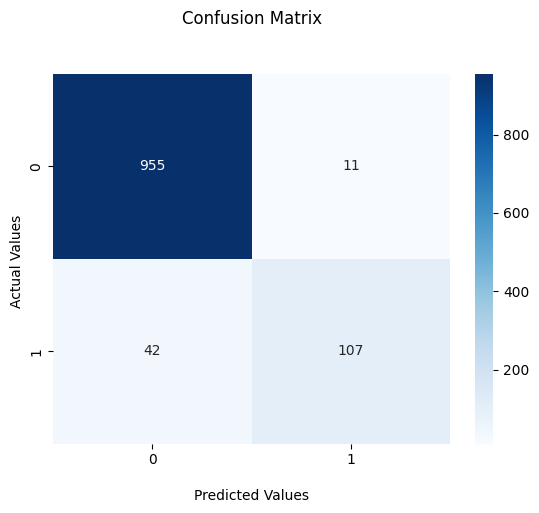

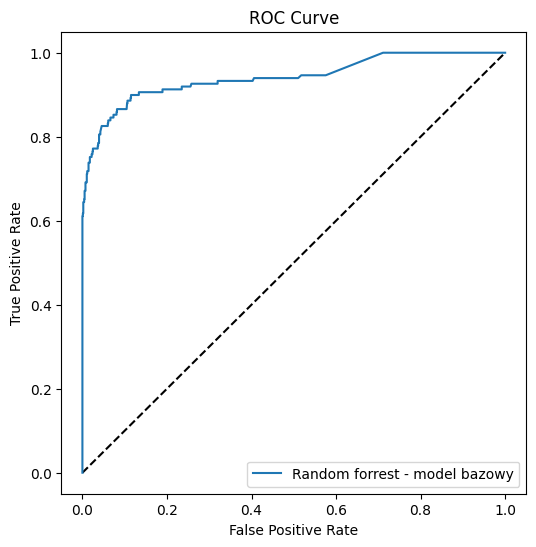

C:\Users\lukpy\AppData\Local\Temp\ipykernel_18976\1238287793.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random forrest - model bazowy,0.801498,0.94139


In [207]:
calculate_metrics(model_pipeline1, 'Random forrest - model bazowy', X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       966
           1       0.91      0.71      0.80       149

    accuracy                           0.95      1115
   macro avg       0.93      0.85      0.88      1115
weighted avg       0.95      0.95      0.95      1115



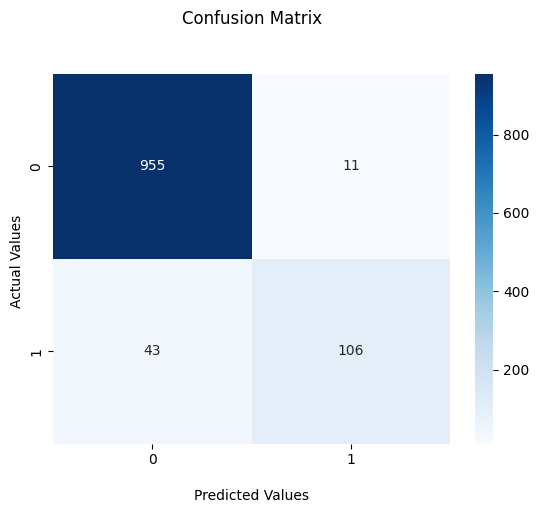

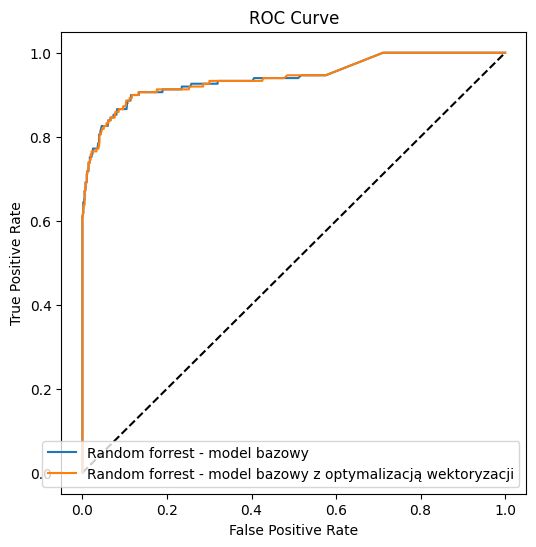

C:\Users\lukpy\AppData\Local\Temp\ipykernel_18976\1238287793.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random forrest - model bazowy,0.801498,0.941390
1,Random forrest - model bazowy z optymalizacją ...,0.796992,0.941268


In [208]:
calculate_metrics(rf0_model_best, 'Random forrest - model bazowy z optymalizacją wektoryzacji', X_test, y_test)

# Filtrowanie cech o największym poziomie importance w modelu bazowym

In [209]:
feature_names = [f"feature {i}" for i in range(wektoryzacja.fit_transform(X_train).shape[1])]
len(feature_names)

131

In [210]:
forest1_importances = pd.Series(model_pipeline1.steps[1][1].feature_importances_, index = feature_names, name='importance')
forest1_importances

feature 0      0.000131
feature 1      0.000270
feature 2      0.000203
feature 3      0.000050
feature 4      0.000124
                 ...   
feature 126    0.000292
feature 127    0.000027
feature 128    0.001537
feature 129    0.000770
feature 130    0.001208
Name: importance, Length: 131, dtype: float64

In [211]:
std = pd.Series(np.std([tree.feature_importances_ for tree in model_pipeline1.steps[1][1].estimators_], axis=0), index = feature_names, name='std')

In [212]:
std

feature 0      0.000503
feature 1      0.001098
feature 2      0.001122
feature 3      0.000377
feature 4      0.000633
                 ...   
feature 126    0.001059
feature 127    0.000269
feature 128    0.003798
feature 129    0.002064
feature 130    0.002841
Name: std, Length: 131, dtype: float64

In [213]:
features_new = pd.concat([forest1_importances, std], axis=1)
features_new

,importance,std
feature 0,0.000131,0.000503
feature 1,0.000270,0.001098
feature 2,0.000203,0.001122
feature 3,0.000050,0.000377
feature 4,0.000124,0.000633
...,...,...
feature 126,0.000292,0.001059
feature 127,0.000027,0.000269
feature 128,0.001537,0.003798
feature 129,0.000770,0.002064


In [224]:
features_new2=features_new[features_new['importance']>0.001]
features_new2.head()

,importance,std
feature 7,0.001763,0.002872
feature 9,0.136341,0.103575
feature 12,0.027068,0.030093
feature 13,0.077339,0.066044
feature 15,0.001055,0.002214


In [215]:
features_list=features_new2.index.values.tolist()
features_list

['feature 7',
 'feature 9',
 'feature 12',
 'feature 13',
 'feature 15',
 'feature 16',
 'feature 19',
 'feature 20',
 'feature 22',
 'feature 24',
 'feature 26',
 'feature 28',
 'feature 29',
 'feature 30',
 'feature 32',
 'feature 37',
 'feature 42',
 'feature 45',
 'feature 46',
 'feature 49',
 'feature 51',
 'feature 52',
 'feature 54',
 'feature 59',
 'feature 60',
 'feature 62',
 'feature 63',
 'feature 65',
 'feature 67',
 'feature 71',
 'feature 74',
 'feature 76',
 'feature 78',
 'feature 79',
 'feature 82',
 'feature 83',
 'feature 84',
 'feature 86',
 'feature 90',
 'feature 91',
 'feature 93',
 'feature 94',
 'feature 97',
 'feature 99',
 'feature 101',
 'feature 102',
 'feature 103',
 'feature 107',
 'feature 108',
 'feature 109',
 'feature 112',
 'feature 113',
 'feature 114',
 'feature 116',
 'feature 117',
 'feature 120',
 'feature 123',
 'feature 128',
 'feature 130']

In [216]:
len(feature_names)

131

In [217]:
X_train_new = pd.DataFrame(wektoryzacja.fit_transform(X_train).toarray(), columns=feature_names)
X_train_new

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 121,feature 122,feature 123,feature 124,feature 125,feature 126,feature 127,feature 128,feature 129,feature 130
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.492412,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.72245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
X_train_fin = X_train_new[features_list]
X_train_fin

,feature 7,feature 9,feature 12,feature 13,feature 15,feature 16,feature 19,feature 20,feature 22,feature 24,...,feature 109,feature 112,feature 113,feature 114,feature 116,feature 117,feature 120,feature 123,feature 128,feature 130
0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.530065,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.349134,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,0.0,0.00000,0.0,0.0,0.556846,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,0.0,0.72245,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [219]:
X_test_new = pd.DataFrame(wektoryzacja.transform(X_test).toarray(), columns=feature_names)
X_test_new

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 121,feature 122,feature 123,feature 124,feature 125,feature 126,feature 127,feature 128,feature 129,feature 130
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.392742,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348778,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484501,0.0,0.349779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [220]:
X_test_fin = X_test_new[features_list]
X_test_fin

,feature 7,feature 9,feature 12,feature 13,feature 15,feature 16,feature 19,feature 20,feature 22,feature 24,...,feature 109,feature 112,feature 113,feature 114,feature 116,feature 117,feature 120,feature 123,feature 128,feature 130
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.440844,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.348778,0.000000,0.000000,0.0,0.315251,0.0,0.315656,0.0,0.0,0.000000,...,0.0,0.0,0.592786,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.484501,0.349779,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1111,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1112,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1113,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.434784,...,0.0,0.0,0.309428,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Szacowanie modelu RF w oparciu o optymalizację hiperparametrów

In [221]:
from sklearn.model_selection import GridSearchCV

params_rf = {'max_depth': [20, 30, 50],
             'min_samples_leaf': [1, 2, 3],
             'n_estimators': [500, 1000]
            }

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             params_rf,
                             scoring='f1_micro',
                             cv=5,
                             verbose=10, n_jobs=-1)

rf_gridsearch.fit(X_train_fin, y_train)

print('\nBest hyperparameter:', rf_gridsearch.best_params_)

rf2_model_best = rf_gridsearch.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best hyperparameter: {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 1000}


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.90      0.77      0.83       149

    accuracy                           0.96      1115
   macro avg       0.93      0.88      0.90      1115
weighted avg       0.96      0.96      0.96      1115



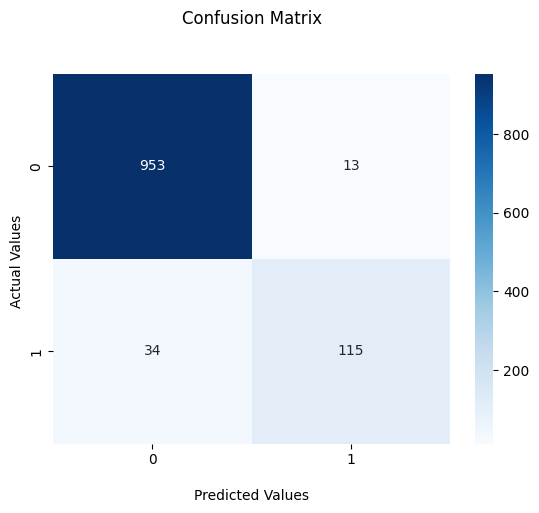

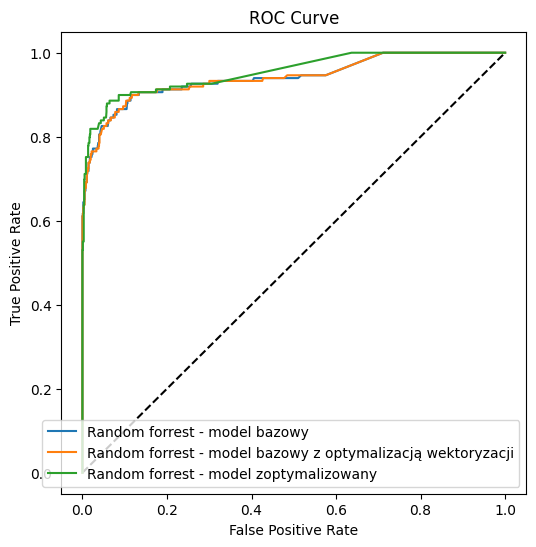

C:\Users\lukpy\AppData\Local\Temp\ipykernel_18976\1238287793.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random forrest - model bazowy,0.801498,0.941390
1,Random forrest - model bazowy z optymalizacją ...,0.796992,0.941268
2,Random forrest - model zoptymalizowany,0.830325,0.953618


In [222]:
calculate_metrics(rf2_model_best, 'Random forrest - model zoptymalizowany', X_test_fin, y_test)